In [1]:
!pip install -qU openai pinecone-client datasets

In [2]:
import openai

# get API key from top-right dropdown on OpenAI website
openai.api_key = "KEY_GOES_HERE"

From here, we can use the OpenAI completion endpoint to ask a question like _“who was the 12th person on the moon and when did they land?” _:

Allow some creativity (hallucination)

In [8]:
# now query text-davinci-003 WITHOUT context
res = openai.Completion.create(
    engine='text-davinci-003',
    prompt=query,
    temperature=1,
    max_tokens=400,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0,
    stop=None
)

res['choices'][0]['text'].strip()

'The 12th person on the moon was Charles "Pete" Conrad Jr. He landed with the rest of the Apollo 12 crew on November 19, 1969.'

Go crazy and make up something (hallucination=2)

In [9]:
# now query text-davinci-003 WITHOUT context
res = openai.Completion.create(
    engine='text-davinci-003',
    prompt=query,
    temperature=2,
    max_tokens=400,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0,
    stop=None
)

res['choices'][0]['text'].strip()

'Peter Jane Stephanie Converink 1990 – he says I interpret Apple that when result Wälder De Pete Cost two were rebeing,12 2019 Jak Jameson York Duary November 44th formerlyn] mission astronauts,m4 Mission America 14u crew 1980time r d Art Sch terai metcon landed Commander Eagle, Moon as\nAlso\n\n\nThe 12th person to land on the Moon was Charles Mister "Sonny" Argumentaut Cocenter  CommanderArg    neau to ate arote Straerlot overit Malark Nova Vance NoGene Sherbourne Serfullygellanmiena arvis1970Kwang moon Edensayember who 16 Gancon GrAddist Astrazulet Chuckosecnor Ahrouseison wholla Docaled 5 thaion Expendtion1969the Rockenthspamenl Neil Black Salriver 21fic mission 8 1970atool 1966Goaws Etderbee squicent Sirfty Claroom 1968 LetoflaSurpsrideearbaguaTerges Batttcharterghew Oy, on 22 / thatll July MCrilbourne Easterurn ]. Us 1929Hall Was American night NASA Albernrt MoonAt Ir 3 Walker Ronald Commander yourlaoly Stewart role Thets00Land Thomaslapse1974Nayerick FreetonDe Gros 1982GuIan Cur

Try to stick to the facts (temperature=0)

In [4]:
query = "who was the 12th person on the moon and when did they land?"

# now query text-davinci-003 WITHOUT context
res = openai.Completion.create(
    engine='text-davinci-003',
    prompt=query,
    temperature=0,
    max_tokens=400,
    top_p=1,
    frequency_penalty=0,
    presence_penalty=0,
    stop=None
)

res['choices'][0]['text'].strip()

'The 12th person on the moon was Harrison Schmitt, and he landed on December 11, 1972.'

We get an accurate answer immediately. Yet, this question is relatively easy, what happens if we ask about a lesser-known topic?

In [11]:
# first let's make it simpler to get answers
def complete(prompt):
    # query text-davinci-003
    res = openai.Completion.create(
        engine='text-davinci-003',
        prompt=prompt,
        temperature=0,
        max_tokens=400,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0,
        stop=None
    )
    return res['choices'][0]['text'].strip()

In [12]:
query = (
    "Which training method should I use for sentence transformers when " +
    "I only have pairs of related sentences?"
)

complete(query)

'If you only have pairs of related sentences, then the best training method to use for sentence transformers is the supervised learning approach. This approach involves providing the model with labeled data, such as pairs of related sentences, and then training the model to learn the relationships between the sentences. This approach is particularly useful when you have limited data, as it allows the model to learn from the data you have provided.'

In [17]:
query = (
    "What is the difference between NLU and NLP?"
)

complete(query)

"NLP (Natural Language Processing) is a branch of artificial intelligence that deals with understanding and generating human language. It is used to analyze text, extract information, and generate natural language from structured data. NLU (Natural Language Understanding) is a subset of NLP that focuses on understanding the meaning of natural language. NLU is used to interpret the intent of a user's input and to extract relevant information from it. NLU is used to build conversational agents, such as chatbots, that can understand and respond to user input."

In [18]:
query = (
    "Is NLU part of NLP?"
)

complete(query)

'Yes, NLU (Natural Language Understanding) is a part of NLP (Natural Language Processing). NLU is a sub-field of NLP that focuses on understanding the meaning of natural language input. It involves tasks such as recognizing the intent of a sentence, extracting entities from a sentence, and understanding the sentiment of a sentence.'

In [23]:
query = (
    "Is NLX part of NLP?"
)

complete(query)

'No, NLX is not part of NLP (Natural Language Processing). NLX stands for Network Layer eXchange and is a protocol for connecting different networks.'

In [24]:
query = (
    "Which training method should I use to train a domain specific NLP model " +
    "when I do not have much training data"
)

complete(query)

'?\n\nIf you do not have much training data, you should use transfer learning. Transfer learning is a technique that allows you to leverage existing models and data to train a new model for a specific task. This technique can be used to train a domain specific NLP model with limited data. You can use pre-trained models such as BERT, GPT-2, or ELMo to fine-tune your model on your specific domain. This will allow you to quickly train a model with limited data and achieve good results.'

In [25]:
query = (
    "What is the maximun text lenght that I can process with BERT?"
)

complete(query)

'The maximum text length that can be processed with BERT is 512 tokens.'

In [26]:
query = (
    "Does BERT treats each word as a token?"
)

complete(query)

'Yes, BERT treats each word as a token. BERT is a transformer-based language model that uses a tokenizer to break down text into individual words or subwords. The tokenizer then assigns each word or subword a unique numerical identifier, which is used to represent the word in the model.'

Although this answer is technically correct, it isn’t an answer. It tells us to use a supervised training method and learn the relationship between sentences. Both of these facts are true but do not answer the original question.

There are two options for allowing our LLM to better understand the topic and, more precisely, answer the question.

We fine-tune the LLM on text data covering the domain of fine-tuning sentence transformers.
We use retrieval-enhanced ML, meaning we add an information retrieval component to our GQA process. Adding a retrieval step allows us to retrieve relevant information and feed this into the LLM as a secondary source of information.

## Building a Knowledge Base 

With option two of implementing retrieval, we need an external “knowledge base “. A knowledge base acts as the place where we store information and as the system that effectively retrieves this information.

A knowledge base is a store of information that can act as an external reference for GQA models. We can think of it as the “long-term memory” for AI systems.

We refer to knowledge bases that can enable the retrieval of semantically relevant information as vector databases.

A vector database stores vector representations of information encoded using specific ML models. These models have an “understanding” of language and can encode passages with similar meanings into a similar vector space and dissimilar passages into a dissimilar vector space.

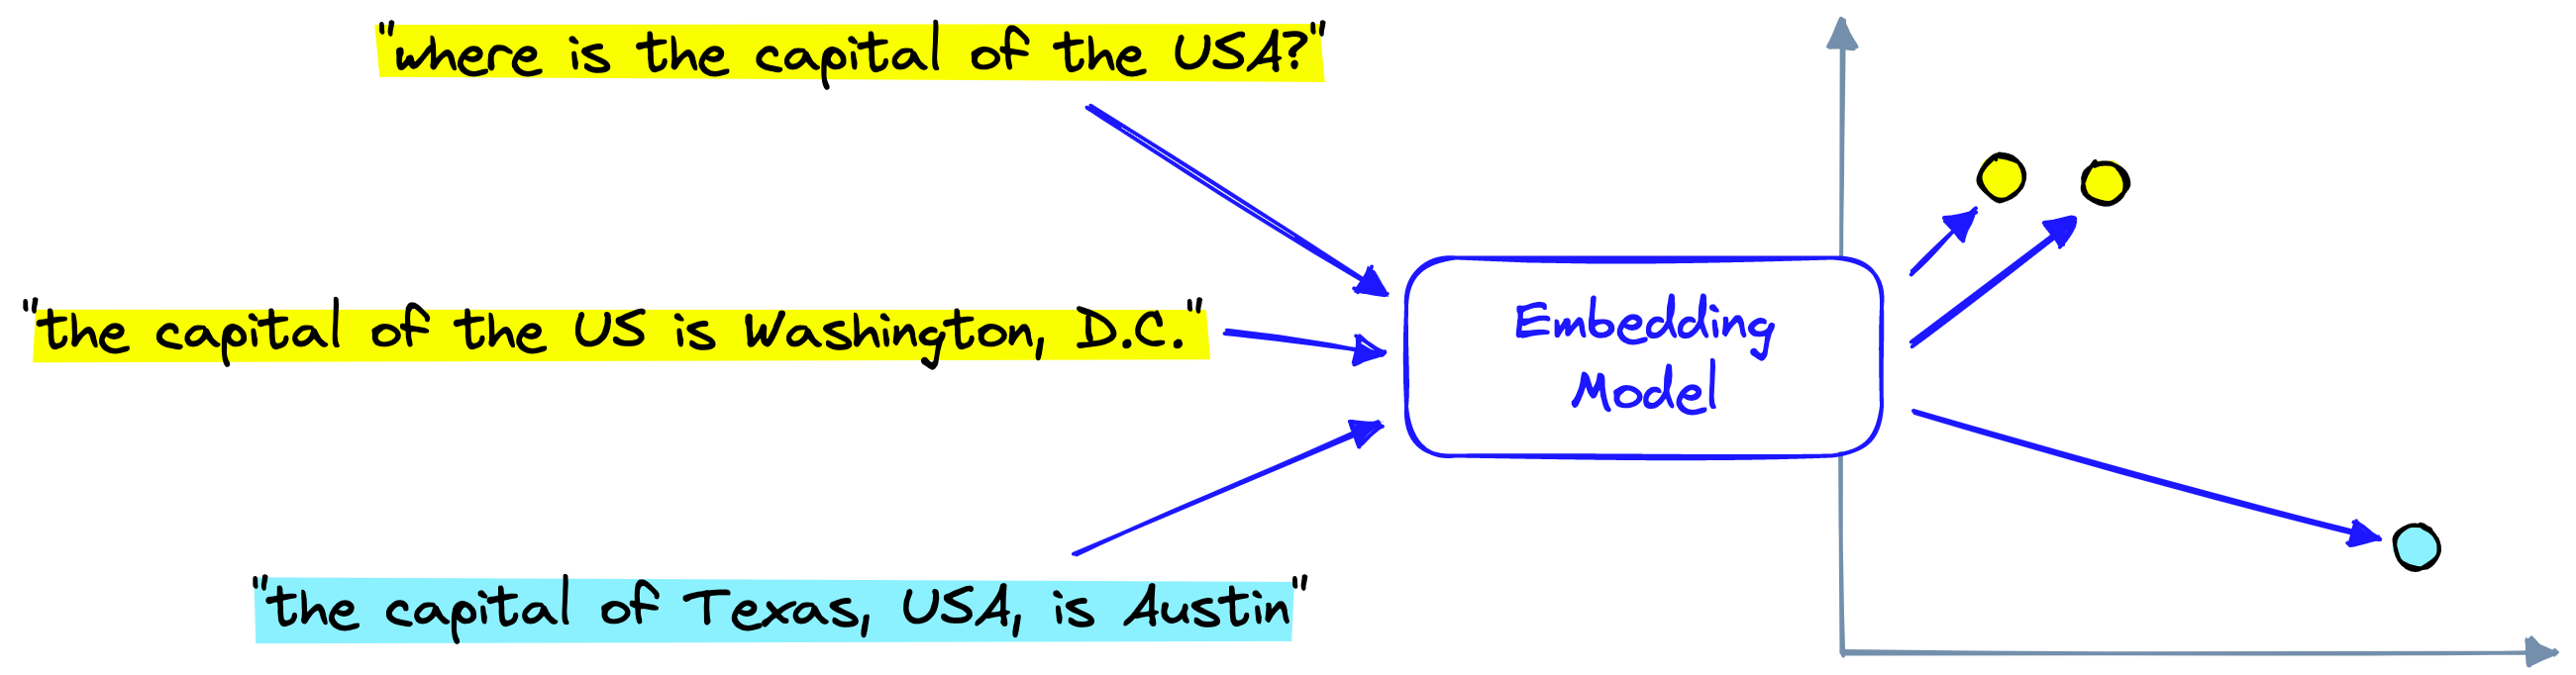